In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns 
import matplotlib.patches as mpatches
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
initialStoryPoints = 800
initialPriorityStoryPoints = 600

ActualData = {'Entry' : [0], 'Sprint' : [0], 'SPR' : [initialStoryPoints], 'PSPR' : [initialPriorityStoryPoints], 'DayWork' : ['Preparation'], 'Hours' : [2]}
ActualData = pd.DataFrame(data=ActualData)

In [3]:
def updateDF(DF, sprint, SPRemaining, prioritySPRemaining, workdone, hours):
    return DF.append({'Entry' : len(ActualData.index), 'Sprint' : sprint, 'SPR' : SPRemaining, 'PSPR' : prioritySPRemaining, 'DayWork' : workdone, 'Hours' : hours}, ignore_index=True)

In [4]:
# UPDATES ACTUAL DATA!!
# updateDF Param:
# ActualData dataframe,
# no of sprint,
# total story points remaining
# total priority story points remaining
# Work done as category
ActualData = updateDF (ActualData, 0, 788, 598, 'Preparation', 2)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Preparation,0,2,600,800,0
1,Preparation,1,2,598,788,0


In [5]:
def undoLastEntry(DF):
    return DF.drop(DF.index[len(DF)-1])

In [6]:
# UNDOES LAST ENTRY!!
# updateDF Param:
# ActualData dataframe,
#ActualData = 
ActualData = undoLastEntry(ActualData)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Preparation,0,2,600,800,0


In [7]:
ActualData = undoLastEntry(ActualData)
ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint


In [8]:
## FOR SPRINT 0 ACTUAL DATA
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Fundur við fyrirtæki', 3*1)
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Fundur við fyrirtæki', 3*1)
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Skýslugerð', 3)
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Sniðmát fyrir frumgerðahönnun', 3)
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Verklagsundirbúningur', 3*5)
ActualData = updateDF (ActualData, 0, initialStoryPoints, initialPriorityStoryPoints, 'Skýslugerð', 2)

ActualData

,DayWork,Entry,Hours,PSPR,SPR,Sprint
0,Fundur við fyrirtæki,0,3,600,800,0
1,Fundur við fyrirtæki,1,3,600,800,0
2,Skýslugerð,2,3,600,800,0
3,Sniðmát fyrir frumgerðahönnun,3,3,600,800,0
4,Verklagsundirbúningur,4,15,600,800,0
5,Skýslugerð,5,2,600,800,0


In [9]:
# Tjékka hvort passar
sprint = 0
print('Total hours spent on sprint ' + str(sprint) + ': ' + str(ActualData[ActualData['Sprint'] == sprint].Hours.sum()))

Total hours spent on sprint 0: 29


In [10]:
# Generates productivity pie chart for a given sprint

def makeMePieChartFromSprint (sprint):
    
    # Frequency table created
    DayWorkDF = ActualData
    DayWorkDF = DayWorkDF[DayWorkDF['Sprint'] == sprint]
    DayWorkDF = DayWorkDF.loc[:, ['DayWork', 'Hours']]
    DayWorkDF = DayWorkDF.groupby(['DayWork'])['Hours'].sum().reset_index()
    DayWorkDF.sort_values(by=['Hours'], ascending=False)
    
    # Pallette
    cpallette = sns.color_palette("husl", 8)

    font = {'size'   : 14}
    plt.rc('font', **font)
    
    plt.pie( DayWorkDF.Hours,
             colors=cpallette,
             autopct='%1.1f%%',
             shadow=False,
             startangle=90 )
    
    plt.legend(DayWorkDF.DayWork, loc="best")
    
    plt.title('Verkefnayfirlit fyrir sprett ' + str(sprint), fontsize=20)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.axis('equal')
    plt.savefig('sprettur' + str(sprint) + '.jpg')

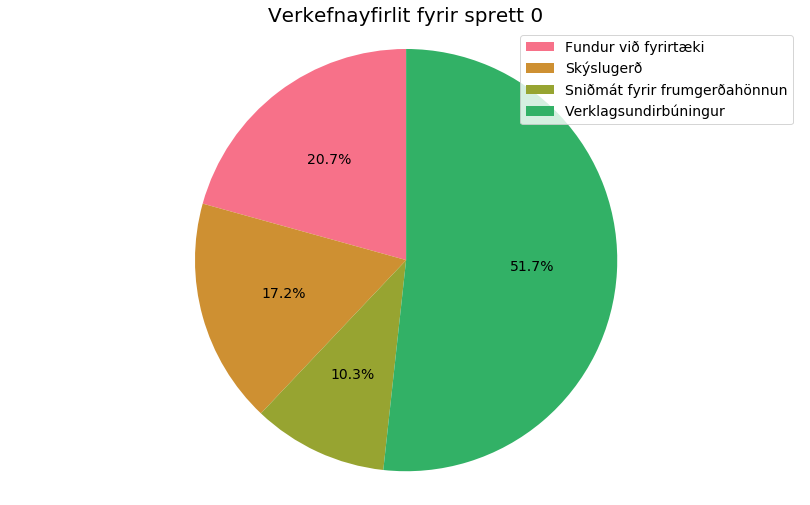

In [11]:
# Plot and save figure from a sprint
sprint = 0
makeMePieChartFromSprint(0)
plt.show()

In [12]:
# PLOTS BURNDOWNCHART FROM SPRINT

def plotBurndownChartFromSprint (sprint) :
    
    font = {'size'   : 13}
    plt.rc('font', **font)
    
    BDchartdata = ActualData[ActualData['Sprint'] == sprint]
    
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')

    plt.figure(figsize = (13, 6)) 
 
    # create a color palette
    palette = plt.get_cmap('Set1')
    x1 = BDchartdata['Entry']
    y1 = BDchartdata['SPR']

    x2 = BDchartdata['Entry']
    y2 = BDchartdata['PSPR']

    AColor = '#99ffeb'
    AAColor = '#00cca3'
    EColor = '#ffcc99'
    EEColor = '#ff9933'

    # Plot the lineplot
    plt.plot(x1, y1, '--',
             marker='',
             color=EColor,
             linewidth=1.9,
             label=BDchartdata.PSPR)

    plt.plot(x2, y2,
             marker='',
             color=AAColor,
             linewidth=1.9,
             label=BDchartdata.SPR)

    plt.fill_between(x1, y2, color=AColor, alpha='0.6')
    plt.fill_between(x2, y1, color=EColor, alpha='0.1')

    plt.ylim(0,1000)
    plt.xlim(BDchartdata.Entry.min(),BDchartdata.Entry.max())

    all_patch = mpatches.Patch(color=EEColor, label='Heildarsögupunktar eftir')
    priority_patch = mpatches.Patch(color=AAColor, label='Heildarforgangssögupunktar eftir')

    plt.legend(handles=[all_patch, priority_patch])
    plt.title('Burndown Framvindurit', fontsize=17)
    plt.ylabel('Sögupunktar', fontsize=14)
    
    ax = plt.gca()
    ax.set_yticks([200,400,600,800,1000])
    ax.set_xticks([BDchartdata.Entry.min(), BDchartdata.Entry.max()])
    ax.set_xticklabels(["Sprettur " + str(sprint),"Sprettur " + str(sprint+1)])
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=14, rotation=30)

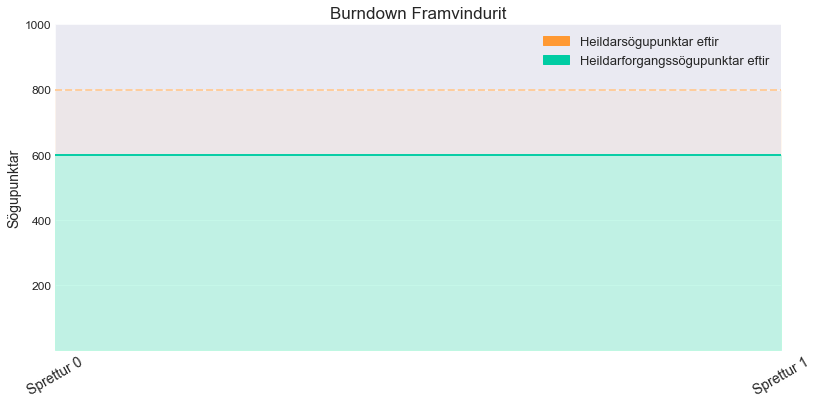

In [13]:
plotBurndownChartFromSprint(0)
plt.show()